# Introduction

* Hello, our names are Cristian, Patrick, Shorter, and Vincent

## Project Objective 
- Perform analysis on trending Youtube videos and the channels that create them in order to craft a machine learning algorithm predicting a videos placement in Top 25 of Youtube's Top 200 trending list. 

- This project runs through the entire Data Science Pipeline and culminates with classification modeling techniques.

## Executive Summary


* 
* 


# Import Section

In [1]:
import pandas as pd
from explore import *
from importlib import reload
import model

import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'env'

# 1) Acquire

Download this linked pickle file into your directory 
first if you have not already
https://drive.google.com/file/d/1twg97V0zm_OUcnyWqzYRs38iNuI-5Yc1/view?usp=share_link

In [2]:
#acquiring the data from a pre-prepared and pickled dataframe
df=pd.read_pickle('prepared_2.pkl')

# 2) Prepare

In [3]:
#preparing the dataframe 
df=prepare_df(df)
df = df.sort_values(by='rank').drop_duplicates(['video_id']).reset_index(drop=True)

In [4]:
#splitting up the data to train,val,test
train, validate, test= train_validate_test_split(df)

##  Wrangling Takeaways
* Using the Youtube API and Youtube Analytics API we pulled in base level statistics for videos and channels
* We planned this out using a API scraper and CRONtabs to automate the video scraping to occur every hour on the hour over a 3 day period.
* Videos pulled were all trending videos from 11 countries, videos pulled from each country were that country's respective top 200 trending videos.
* Format of some features from the API were a nuisance:
  * Example: `duration` being a string
  * Example: `categoryId` being a numerical value that had to be encoded to represent the category name.
  * Example: `trending_date` not being in the same format as `PublishedAt`
### Nulls/Missing Values
* Nulls found in `descriptions` were handled by filling with 'No Description"

### Feature Engineering (Highlights)
* Top 25 (TARGET): Has the video ever been ranked in the top 25
* Rank: Highest rank acheived by a video worldwide
* Engagement: The level of audience engagement
* Word Bank: Words in the tags and descriptions
* Age: How old was a video at its peak rank

---


# 3)Exploration

`What we did:`

- We explored the differences in category
- Differences in regions
- What effect views/likes more
- Do comments effect the amount of views a video would have
- Does freedom of words effect views

# Hypotheses:

`Hypotheses1:`Are disable comments optaining more views the none disable comments:

- `H0-`Disable comments optain more views then not disable 

- `Ha-`non disabled comments get more views then disable comments

`Hypotheses2:`Does comment value and views have a corralantioin together?

- `H0-`Comments and view have a high corralations

- `Ha-`Comments and views dont have high corraltions 

`Hypotheses3:`Does the category effect the amount of like receive from the video?

- `H0`- Category effect amount of likes

- `Ha`- Category doesnt effect amount of like received

`Hypotheses4:`What is the most frequent occuring bigrams per category 

`Hypotheses5:`Total count of words per category,Does category effect total amount of words??


`Hypotheses6:`Are some region more active then others??? for example likes/views

## Spotlight - `Disabled Comments`


- **Question:** Are disable comments optaining more views the none disable comments
 
- **Answer:** Yes disable comments do effect views by a decent amount 

### Takeaways:
    
- Non disable comments take up about 99 percent of the total comment

- Even tho disable comments take up alot more the gap on views isn't as great as we would've thought 


### 1. Are videos with disabled comments obtaining more views the none disable comments:

`H0-`Disable comments optain more views then not disable 

`Ha-`non disabled comments get more views then disable comments

In [5]:
#stats test anova:needed
comments_stats(train)

We reject the null hypothesis
We can say that we have confidence that comments_disabled is related to view_count


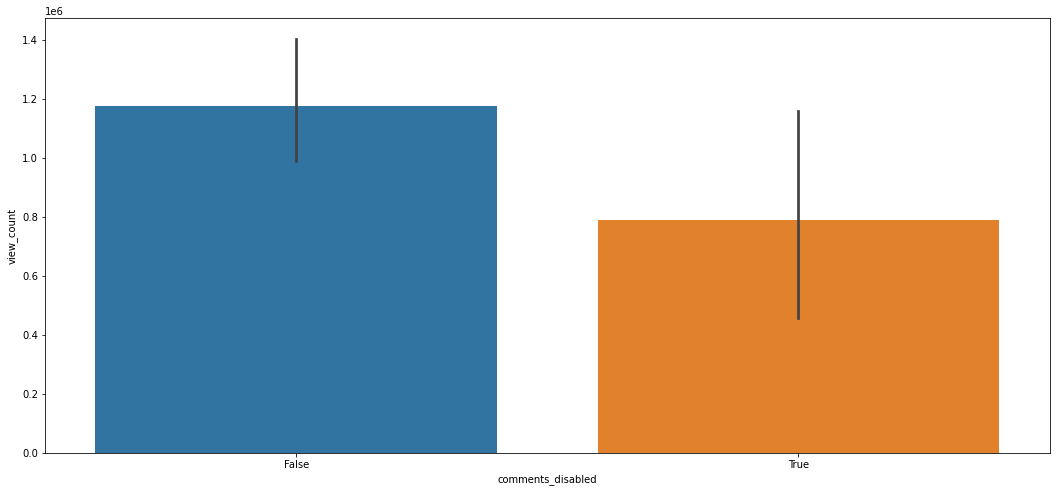

In [6]:
disable_comments2(train)

## Spotlight - `Comment value/engament`


- **Question:** Is there a correlation between comments and view count?
 
- **Answer:** Yes, there is a statistical correlation between comments and view counts? 


### Takeaways:
    
- Entertainment has the highest engament/comment count

- Look like most videos dont get past the 100k comment count but 2

- 25k seem to be the average comment count 

# 2. Does comment value and views have a corralantioin together??

`H0-`Comments and view have a high corralations

`Ha-`Comments and views dont have high corraltions 

In [7]:
comments_stats2(train)

We reject the null hypothesis
We can say that we have confidence that comment_count is related to engagement


In [10]:
df[df.comment_count > 400000]

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,...,title_in_tags,pct_tags_in_description,title_lengths,desc_lengths,tags_length,content_rate,views_per_sub,clean,stemmed,lemmatized
74,c6ASQOwKkhk,진 (Jin) 'The Astronaut' Official MV,2022-10-28 04:00:01+00:00,HYBE LABELS,Music,2022-11-02 00:00:00+00:00,HYBE HYBE LABELS 하이브 하이브레이블즈,30828129,4334976,500675,...,0,0.0,35,2816,28,0.194376,0.448083,jin ' astronaut ' official mvcredits director ...,jin ' astronaut ' offici mvcredit director yon...,jin ' astronaut ' official mvcredits director ...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   video_id                 2019 non-null   object             
 1   title                    2019 non-null   object             
 2   publishedAt              2019 non-null   datetime64[ns, UTC]
 3   channelTitle             2019 non-null   object             
 4   categoryId               2019 non-null   object             
 5   trending_date            2019 non-null   datetime64[ns, UTC]
 6   tags                     2019 non-null   object             
 7   view_count               2019 non-null   int64              
 8   likes                    2019 non-null   int64              
 9   comment_count            2019 non-null   int64              
 10  thumbnail_link           2019 non-null   object             
 11  comments_disabled        2019 

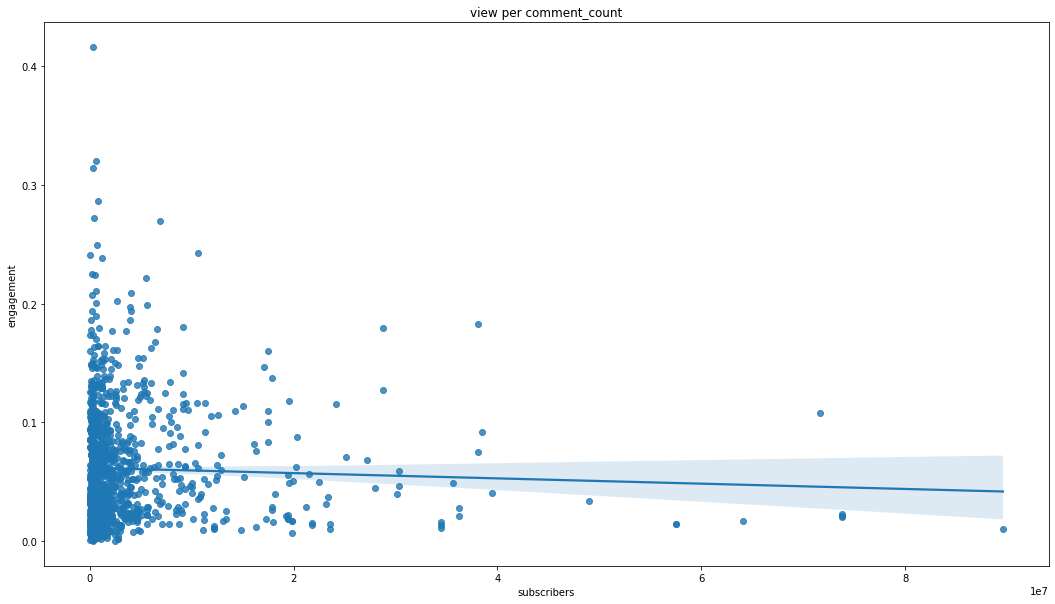

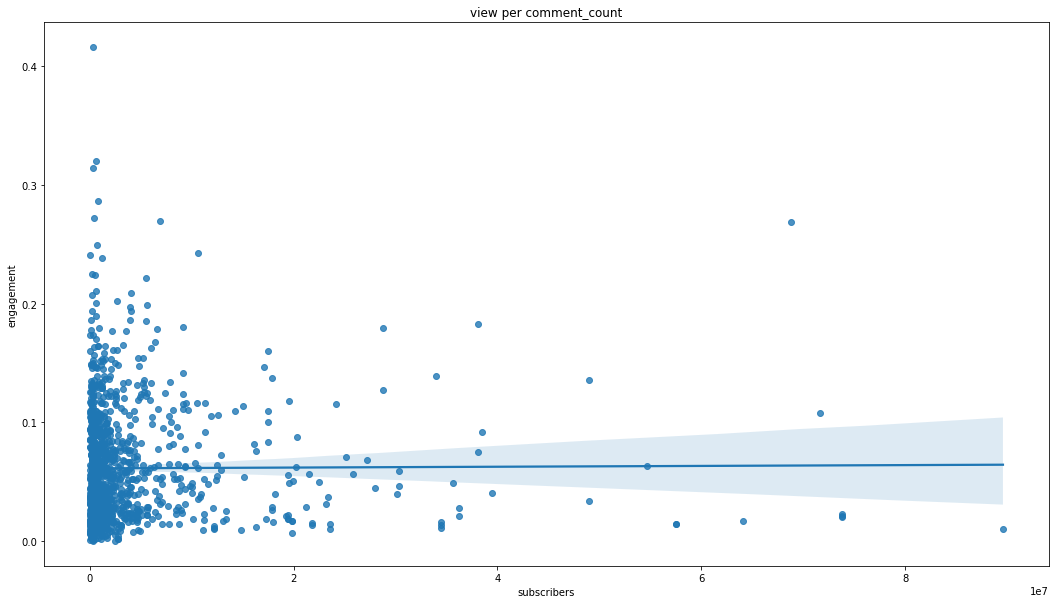

In [16]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.regplot(data=train[train.comment_count < 30000],x='subscribers',y='engagement')
plt.title('view per comment_count')
plt.show()
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.regplot(data=train[train.comment_count < 100000],x='subscribers',y='engagement')
plt.title('view per comment_count')
plt.show()

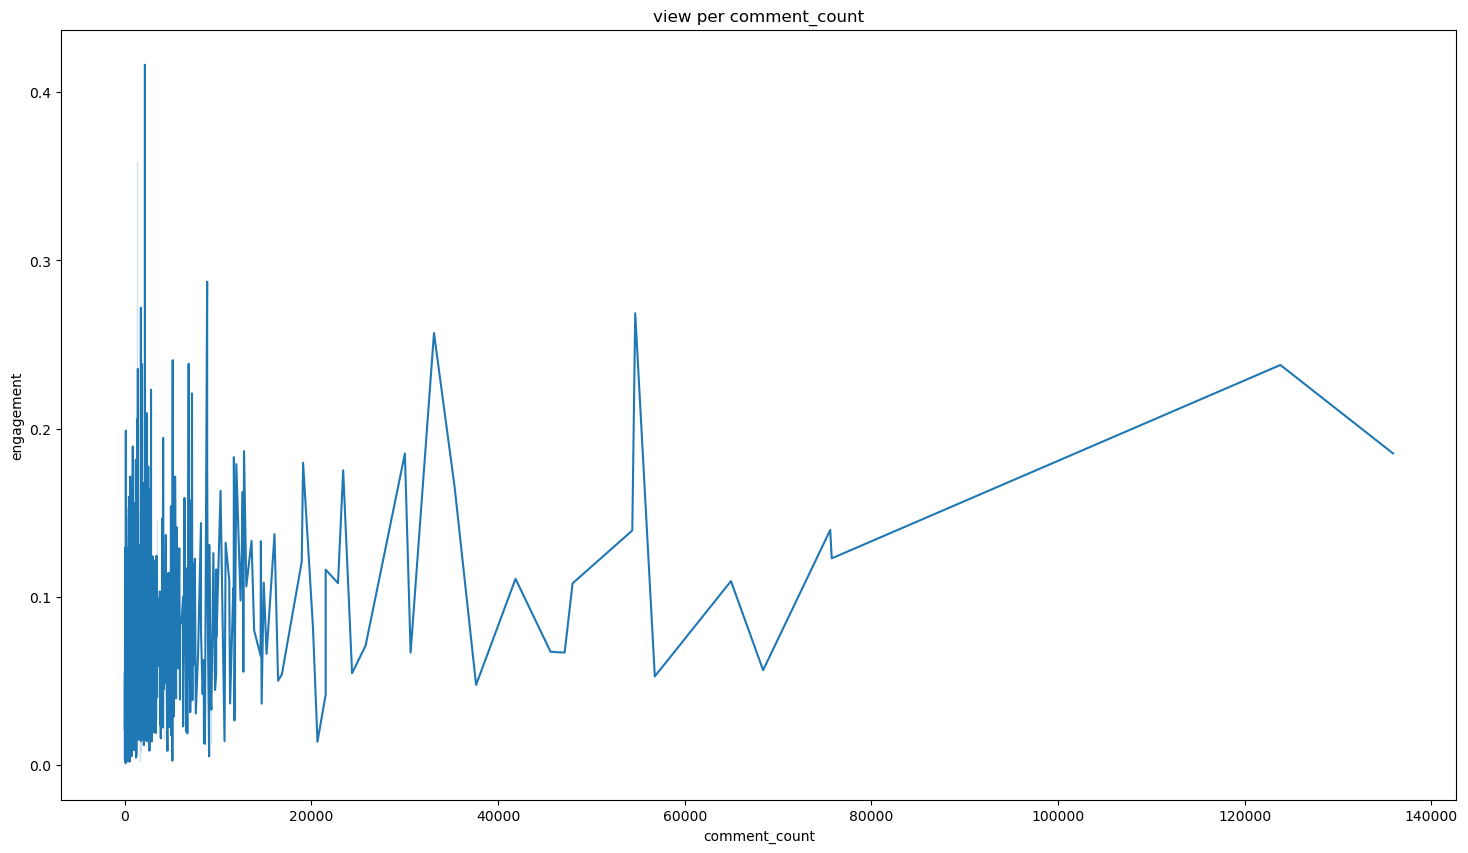

In [ ]:
comments_views(train)

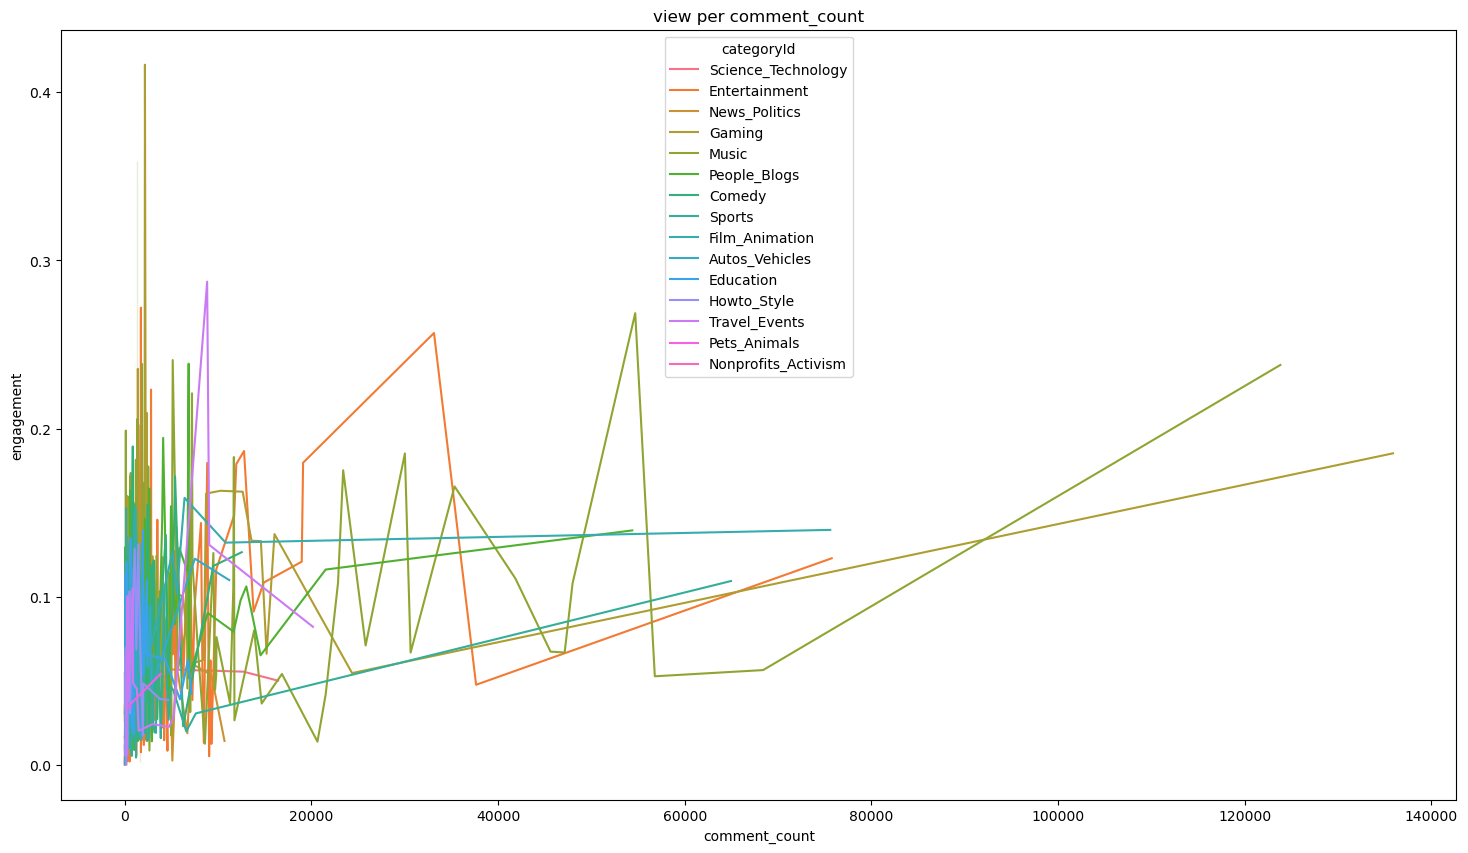

In [ ]:
comments_views2(train)

## Spotlight - `Category`


- **Question:** Does the category effect the amount of like receive from the video? 
 
- **Answer:** short answer yes it does some of them are more active then others 
### Takeaways:
- Music and Entertainment are the highest liked

- Sport,new politics,and non profits are the lowest liked

# `Hypotheses3:`Does the category effect the amount of like receive from the video?

- `H0`- Category effect amount of likes

- `Ha`- Category doesnt effect amount of like received

- Answers for each category below second visual

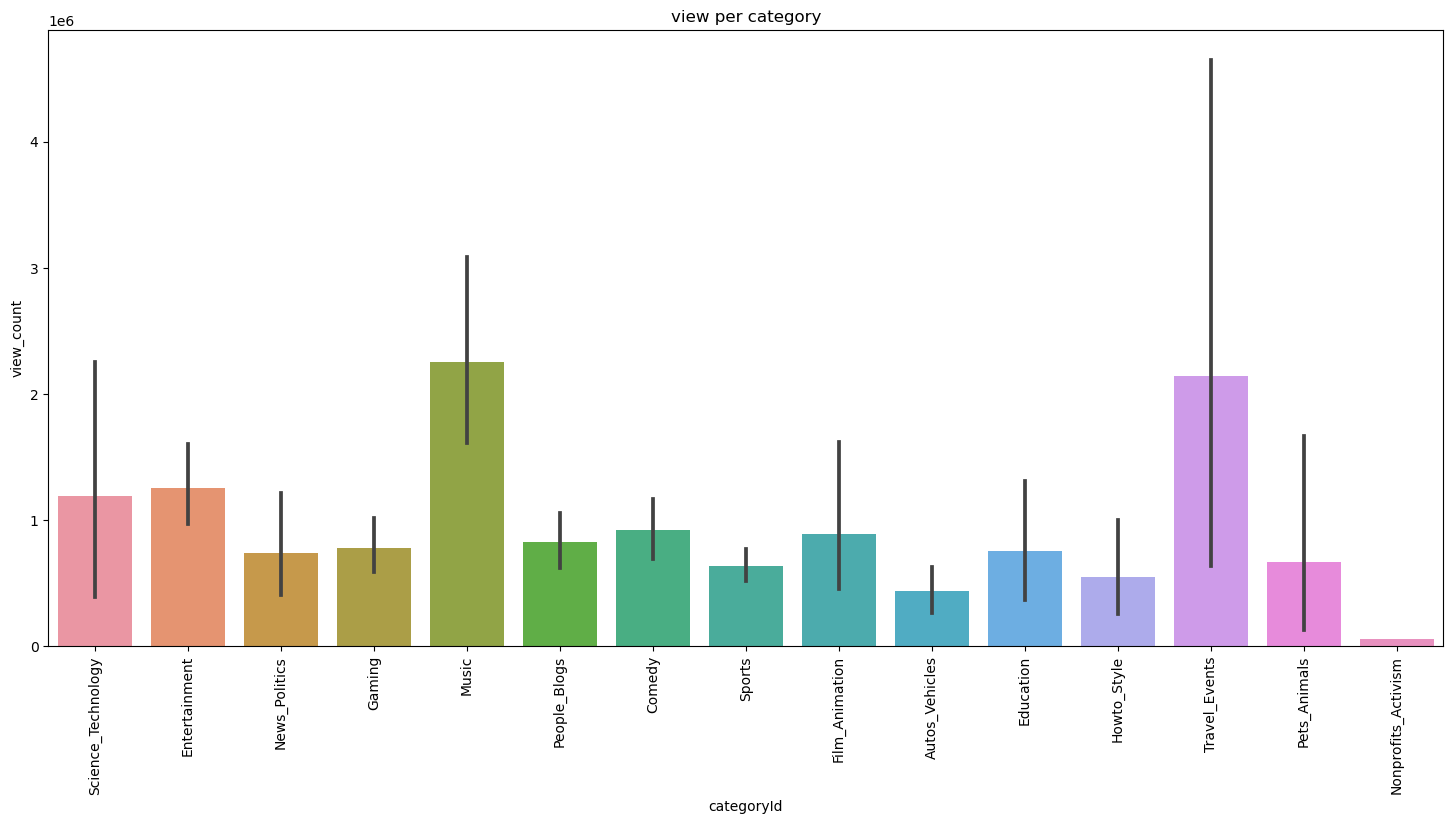

In [ ]:
#comparing likes with categorys
category_views2(train)

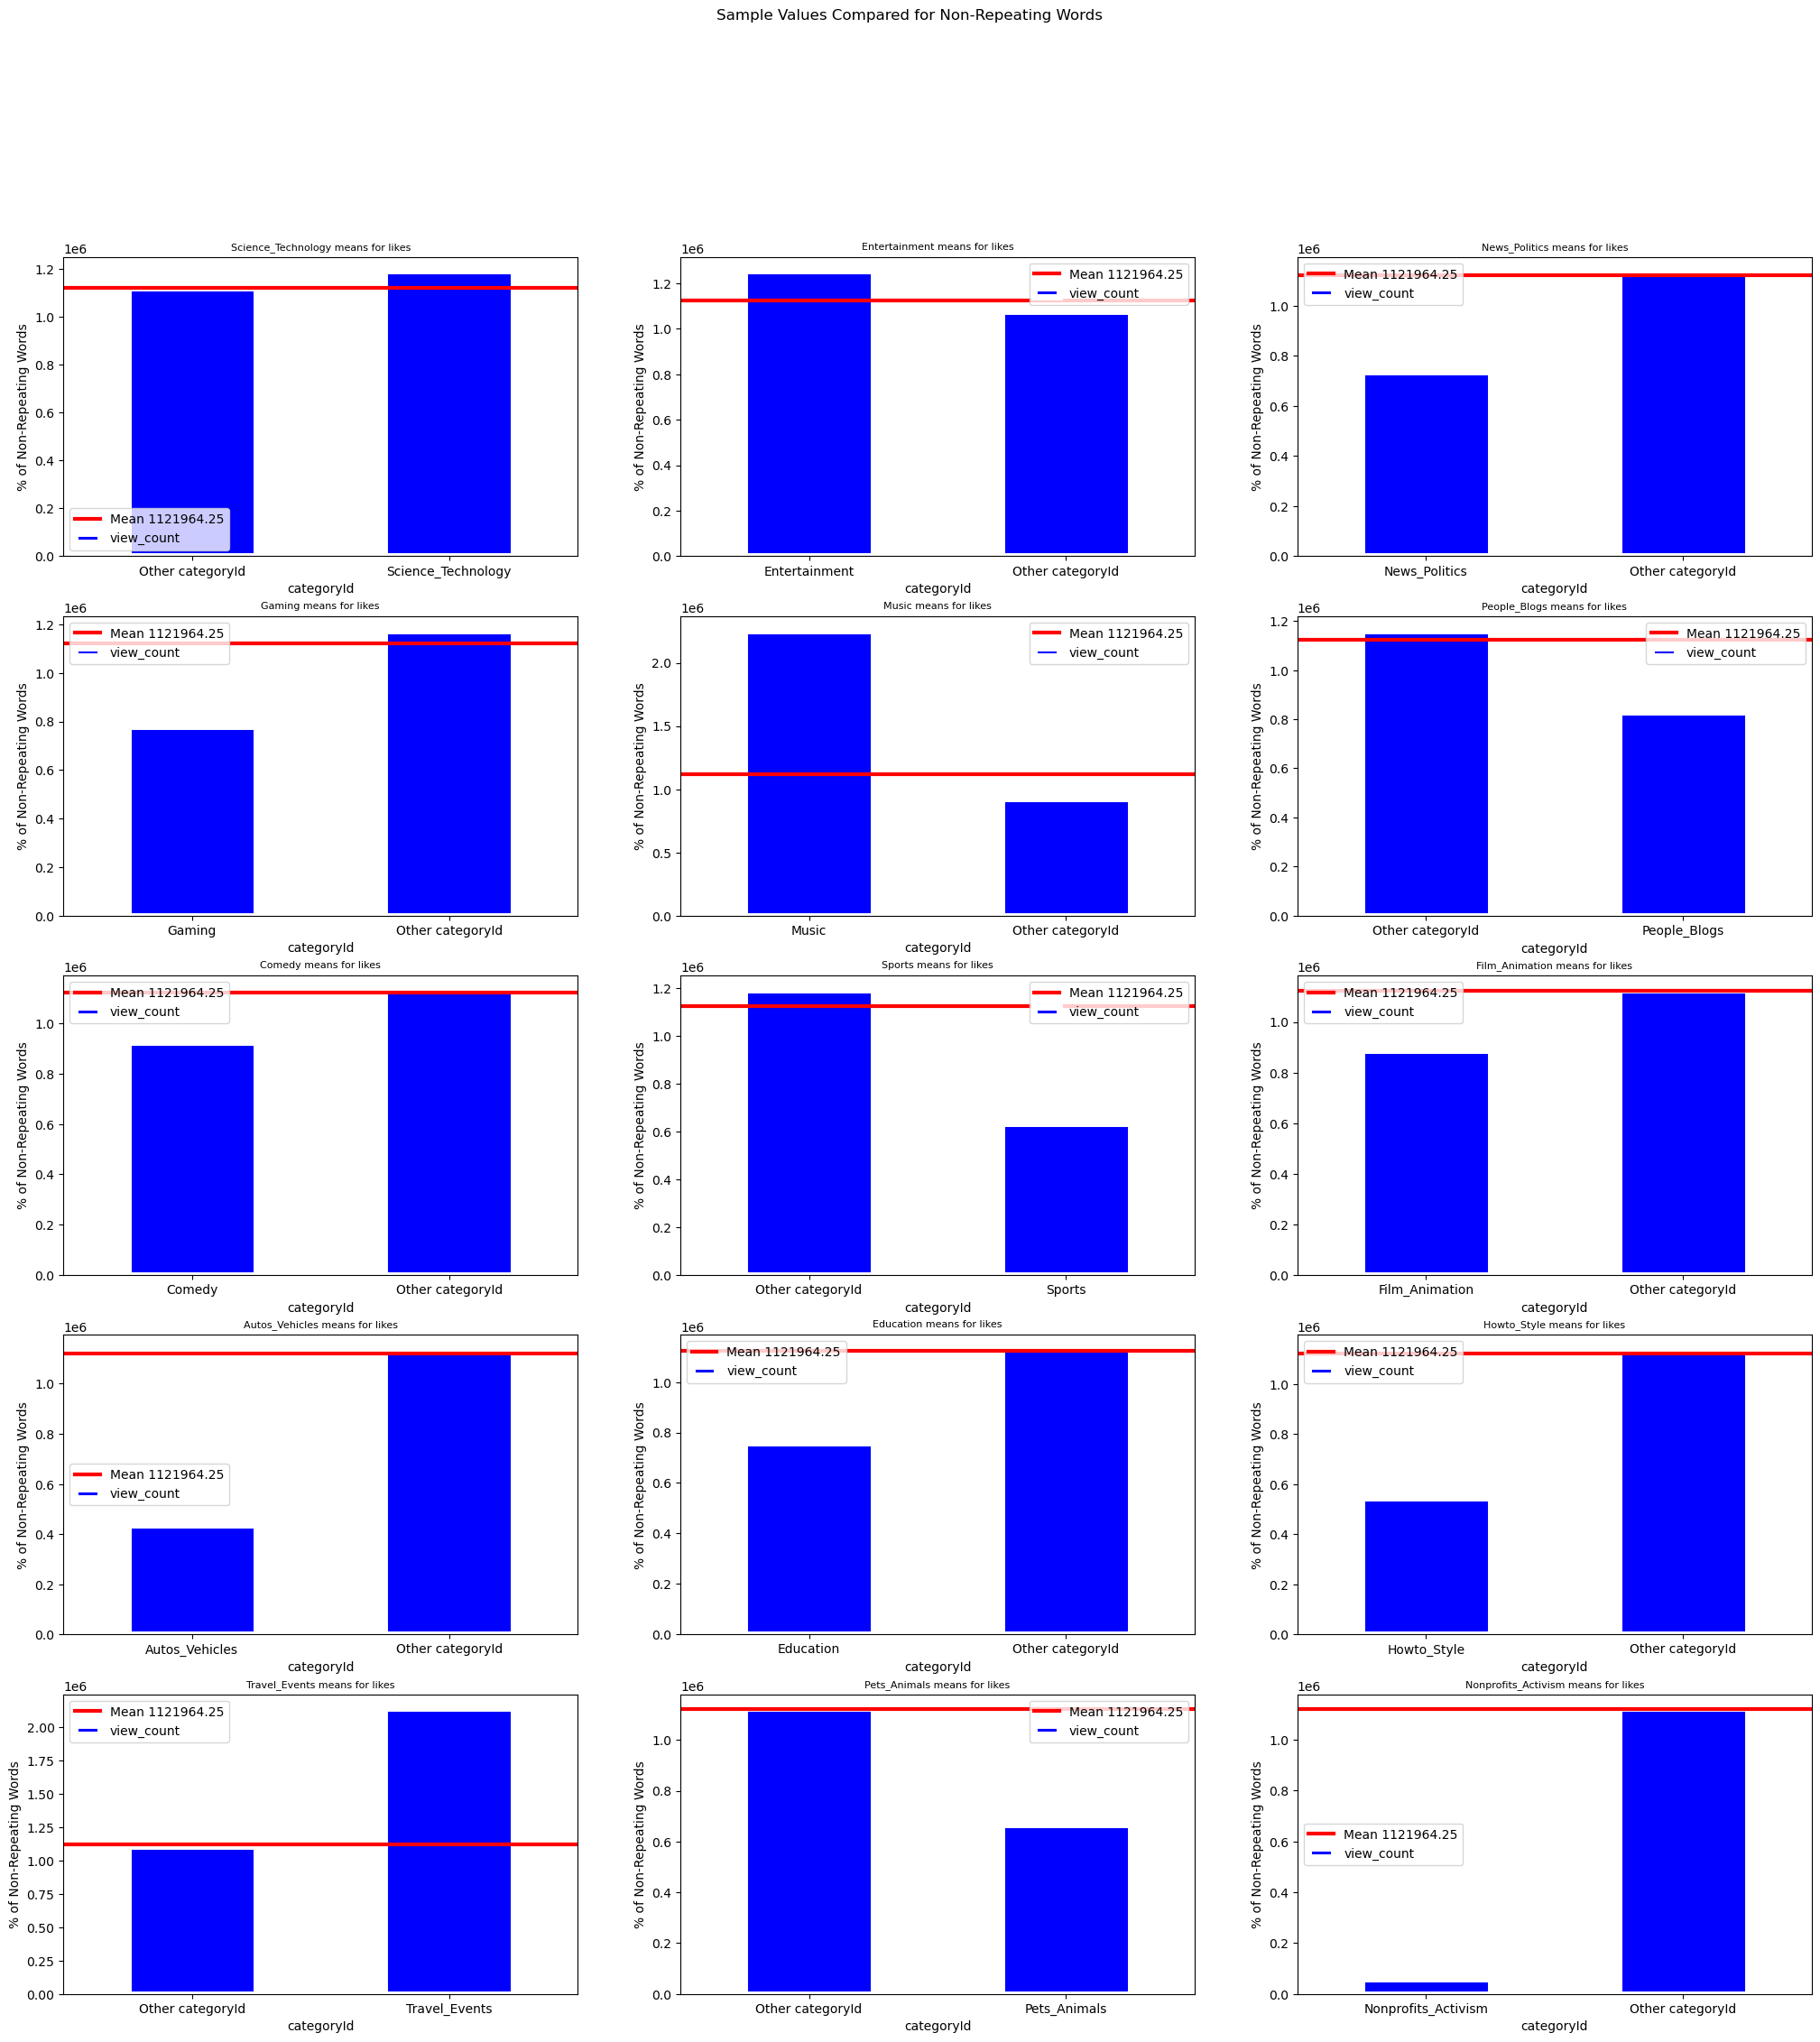

view_count <-target | categoryId <-population name | Science_Technology <-sample name
We fail to reject the null hypothesis ( Science_Technology as a sample has equal mean values to categoryId as a population regarding likes ) t=0.13638, p=0.89423
----------
view_count <-target | categoryId <-population name | Entertainment <-sample name
We fail to reject the null hypothesis ( Entertainment as a sample has equal mean values to categoryId as a population regarding likes ) t=0.79515, p=0.42715
----------
view_count <-target | categoryId <-population name | News_Politics <-sample name
We fail to reject the null hypothesis ( News_Politics as a sample has equal mean values to categoryId as a population regarding likes ) t=-1.87517, p=0.06742
----------
view_count <-target | categoryId <-population name | Gaming <-sample name
We reject the null Hypothesis ( G̶a̶m̶i̶n̶g̶ ̶a̶s̶ ̶a̶ ̶s̶a̶m̶p̶l̶e̶ ̶h̶a̶s̶ ̶e̶q̶u̶a̶l̶ ̶m̶e̶a̶n̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶c̶a̶t̶e̶g̶o̶r̶y̶I̶d̶ ̶a̶s̶ ̶a̶ ̶p̶o̶p̶u̶l̶a̶t̶i̶

In [ ]:
#comparing likes with categorys
category_views3(train)

## Spotlight - `Bigrams`


- Question: What is the most frequent occuring bigrams per category 
 
- Answer: taylor swift for music/clash clan for gaming/top rank for sports 
### Takeaways:
    
- no really take aways from this beside taylor swift always being popular in music and clash of clan always being popular for years 

# `Hypotheses4:`What is the most frequent occuring bigrams per category 

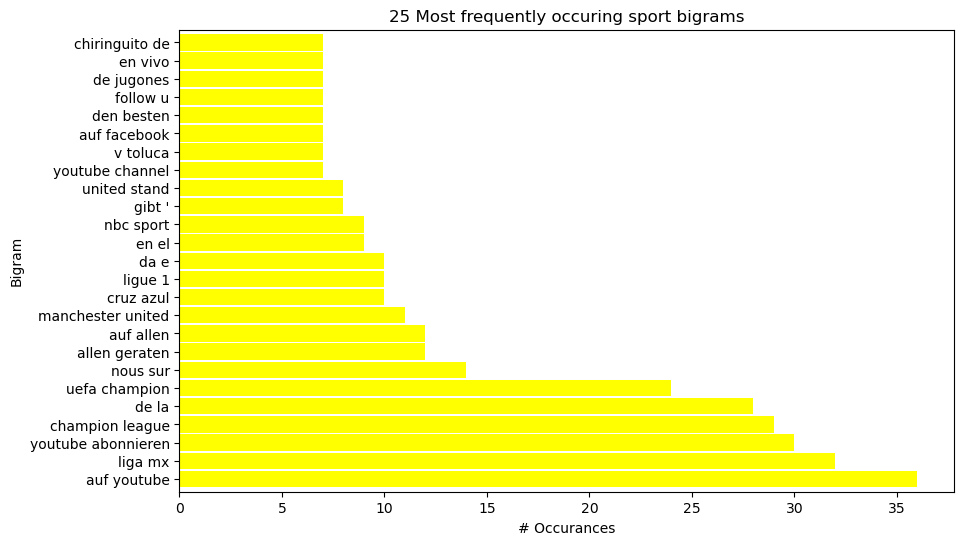

In [ ]:
sport_bigrams(train)

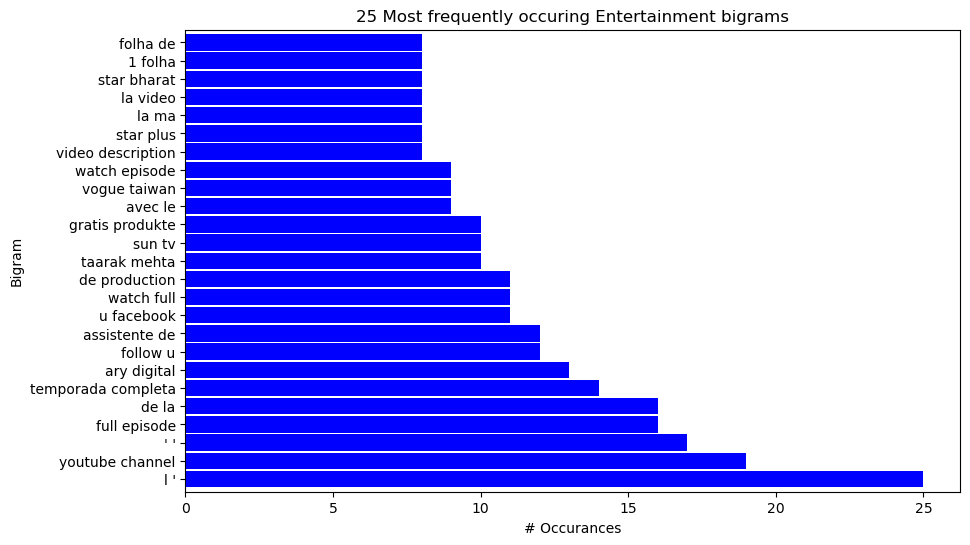

In [ ]:
entertainment_bigrams(train)

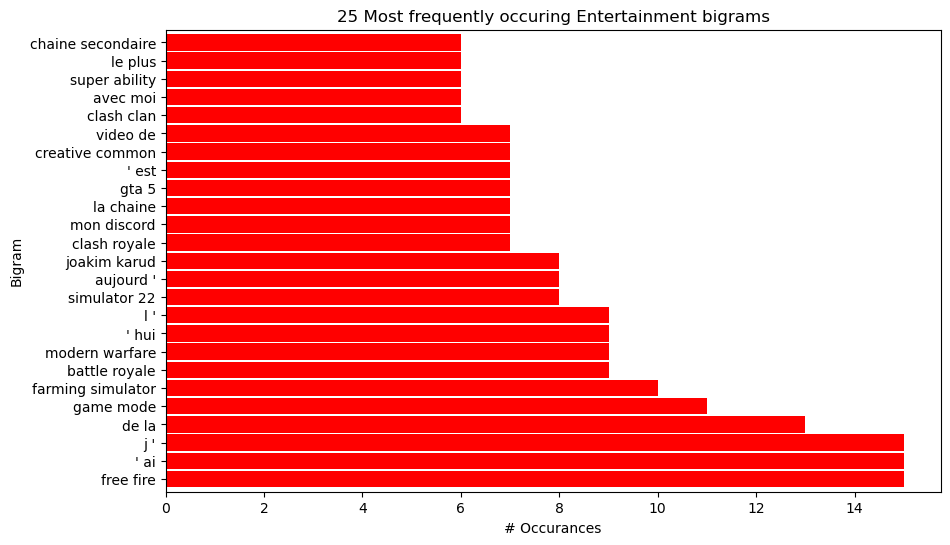

In [ ]:
gaming_bigrams(train)

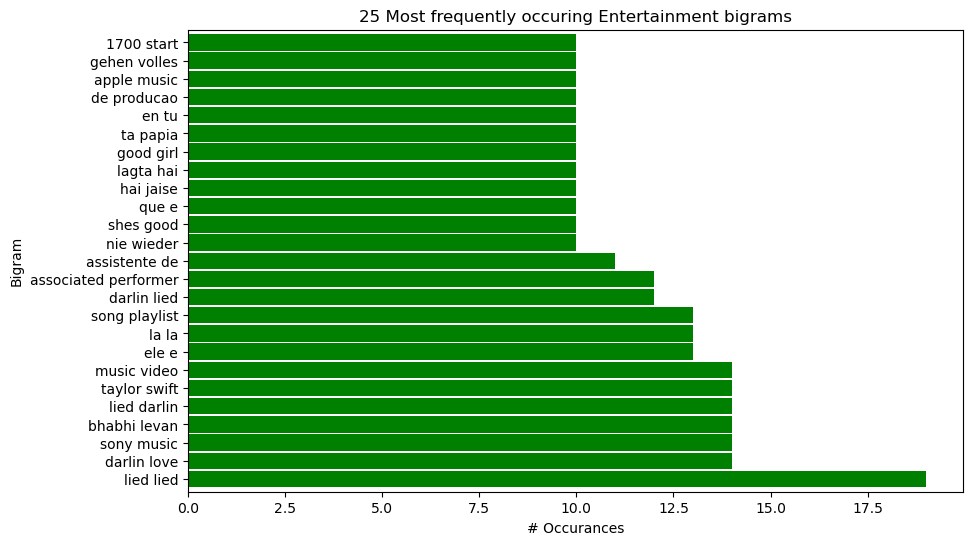

In [ ]:
Music_bigrams(train)

## Spotlight - `Total count`


- **Question:** Total count of words per category,Does category effect total amount of words?? 
 
- **Answer:** Entertainment and music are the highest while the lowest are nonprofit and pet animals
### Takeaways:
    
- Entertainment has the highest word count while music is second

- Lowest word count is nonprofit but has the highest engament


# `Hypotheses5:`Total count of words per category,Does category effect total amount of words??

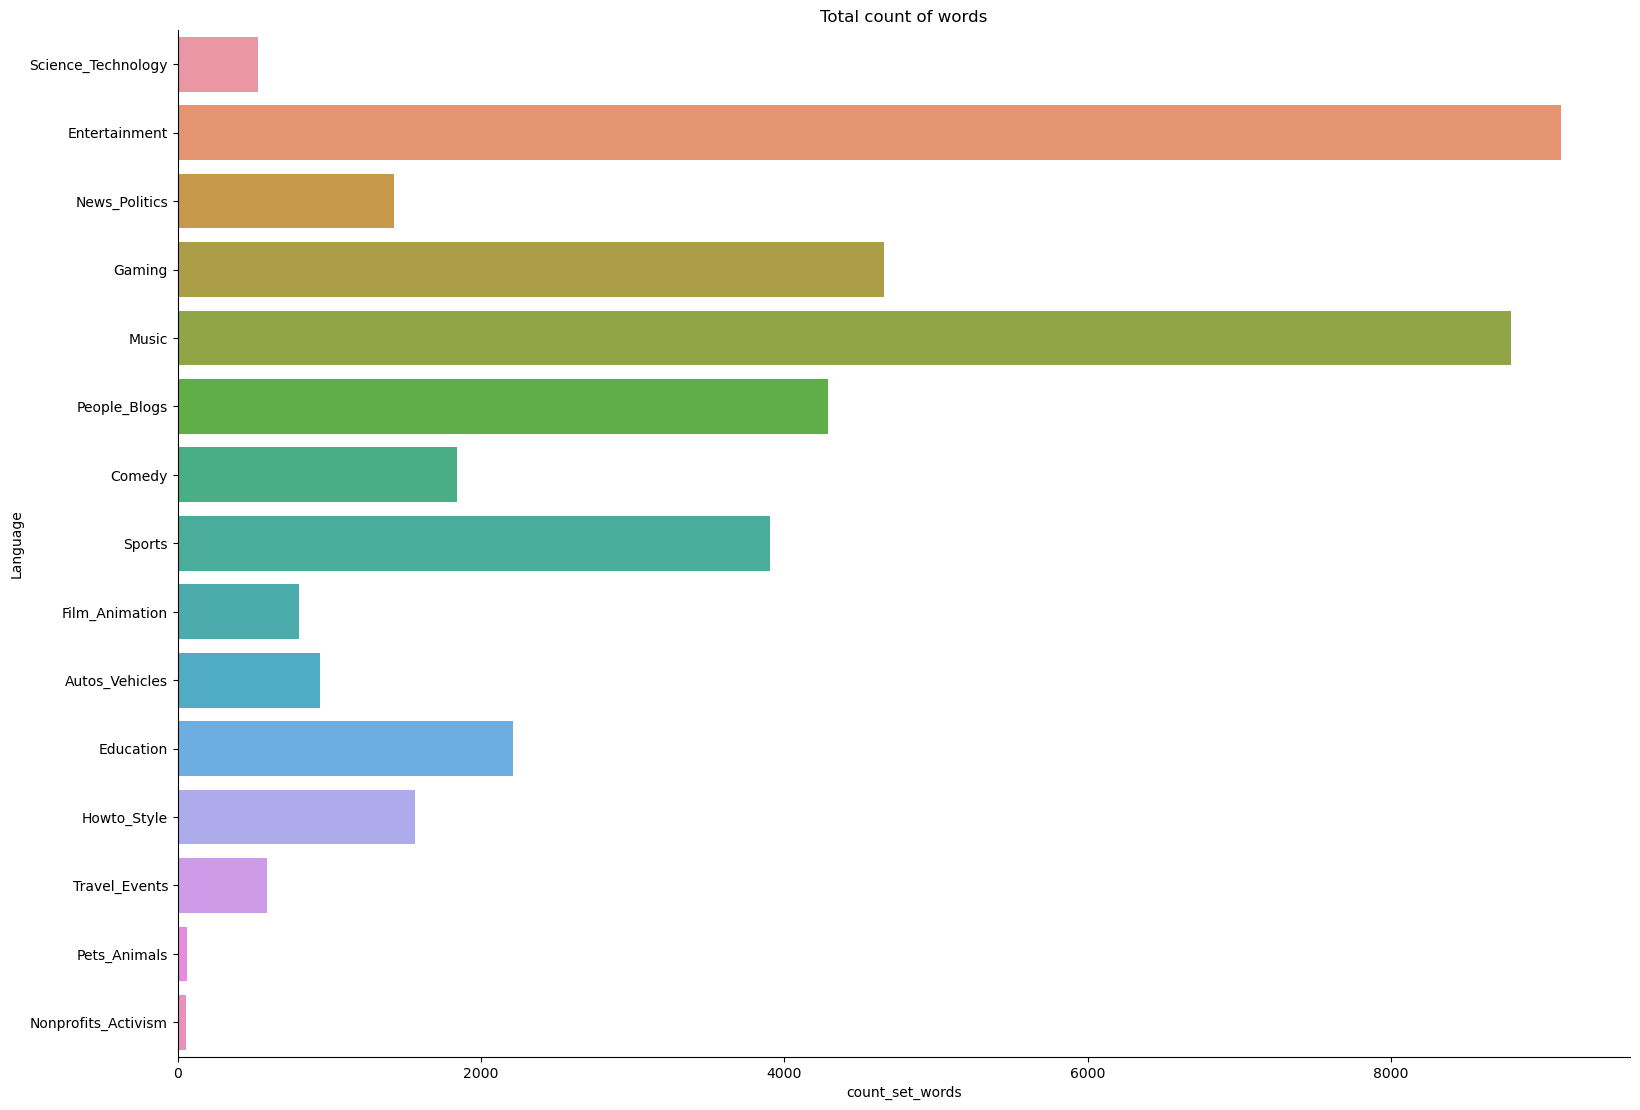

0      527
1     9121
2     1426
3     4659
4     8789
5     4286
6     1844
7     3908
8      797
9      937
10    2214
11    1567
12     588
13      60
14      57
Name: count_set_words, dtype: int64


In [ ]:
#total word count graph
word_count(train)

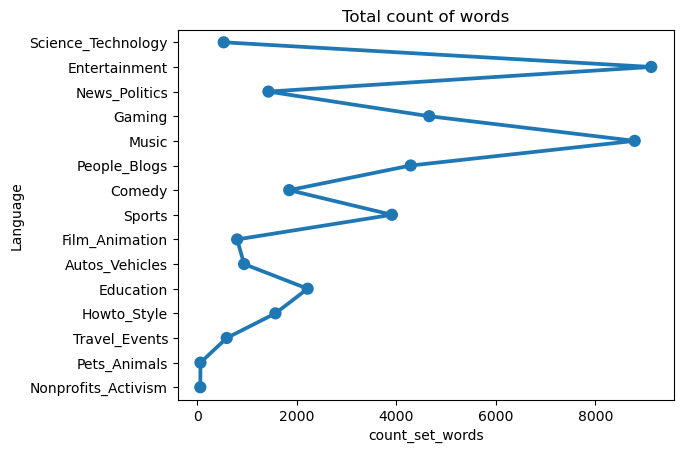

In [ ]:
#total word count graph
word_count2(train)

## Spotlight - `Region activities`


- **Question:** Are some region more active then others??? for example likes/views
 
- **Answer:** Yes some regions have different trending views then others for example korea has more views on new policies then mexico
### Takeaways:
- All videos went viral on nov1,2022 
- Most video went viral after 2 days
- One video went viral on Oct3,2022

# `Hypotheses6:`Are some region more active then others??? for example likes/views

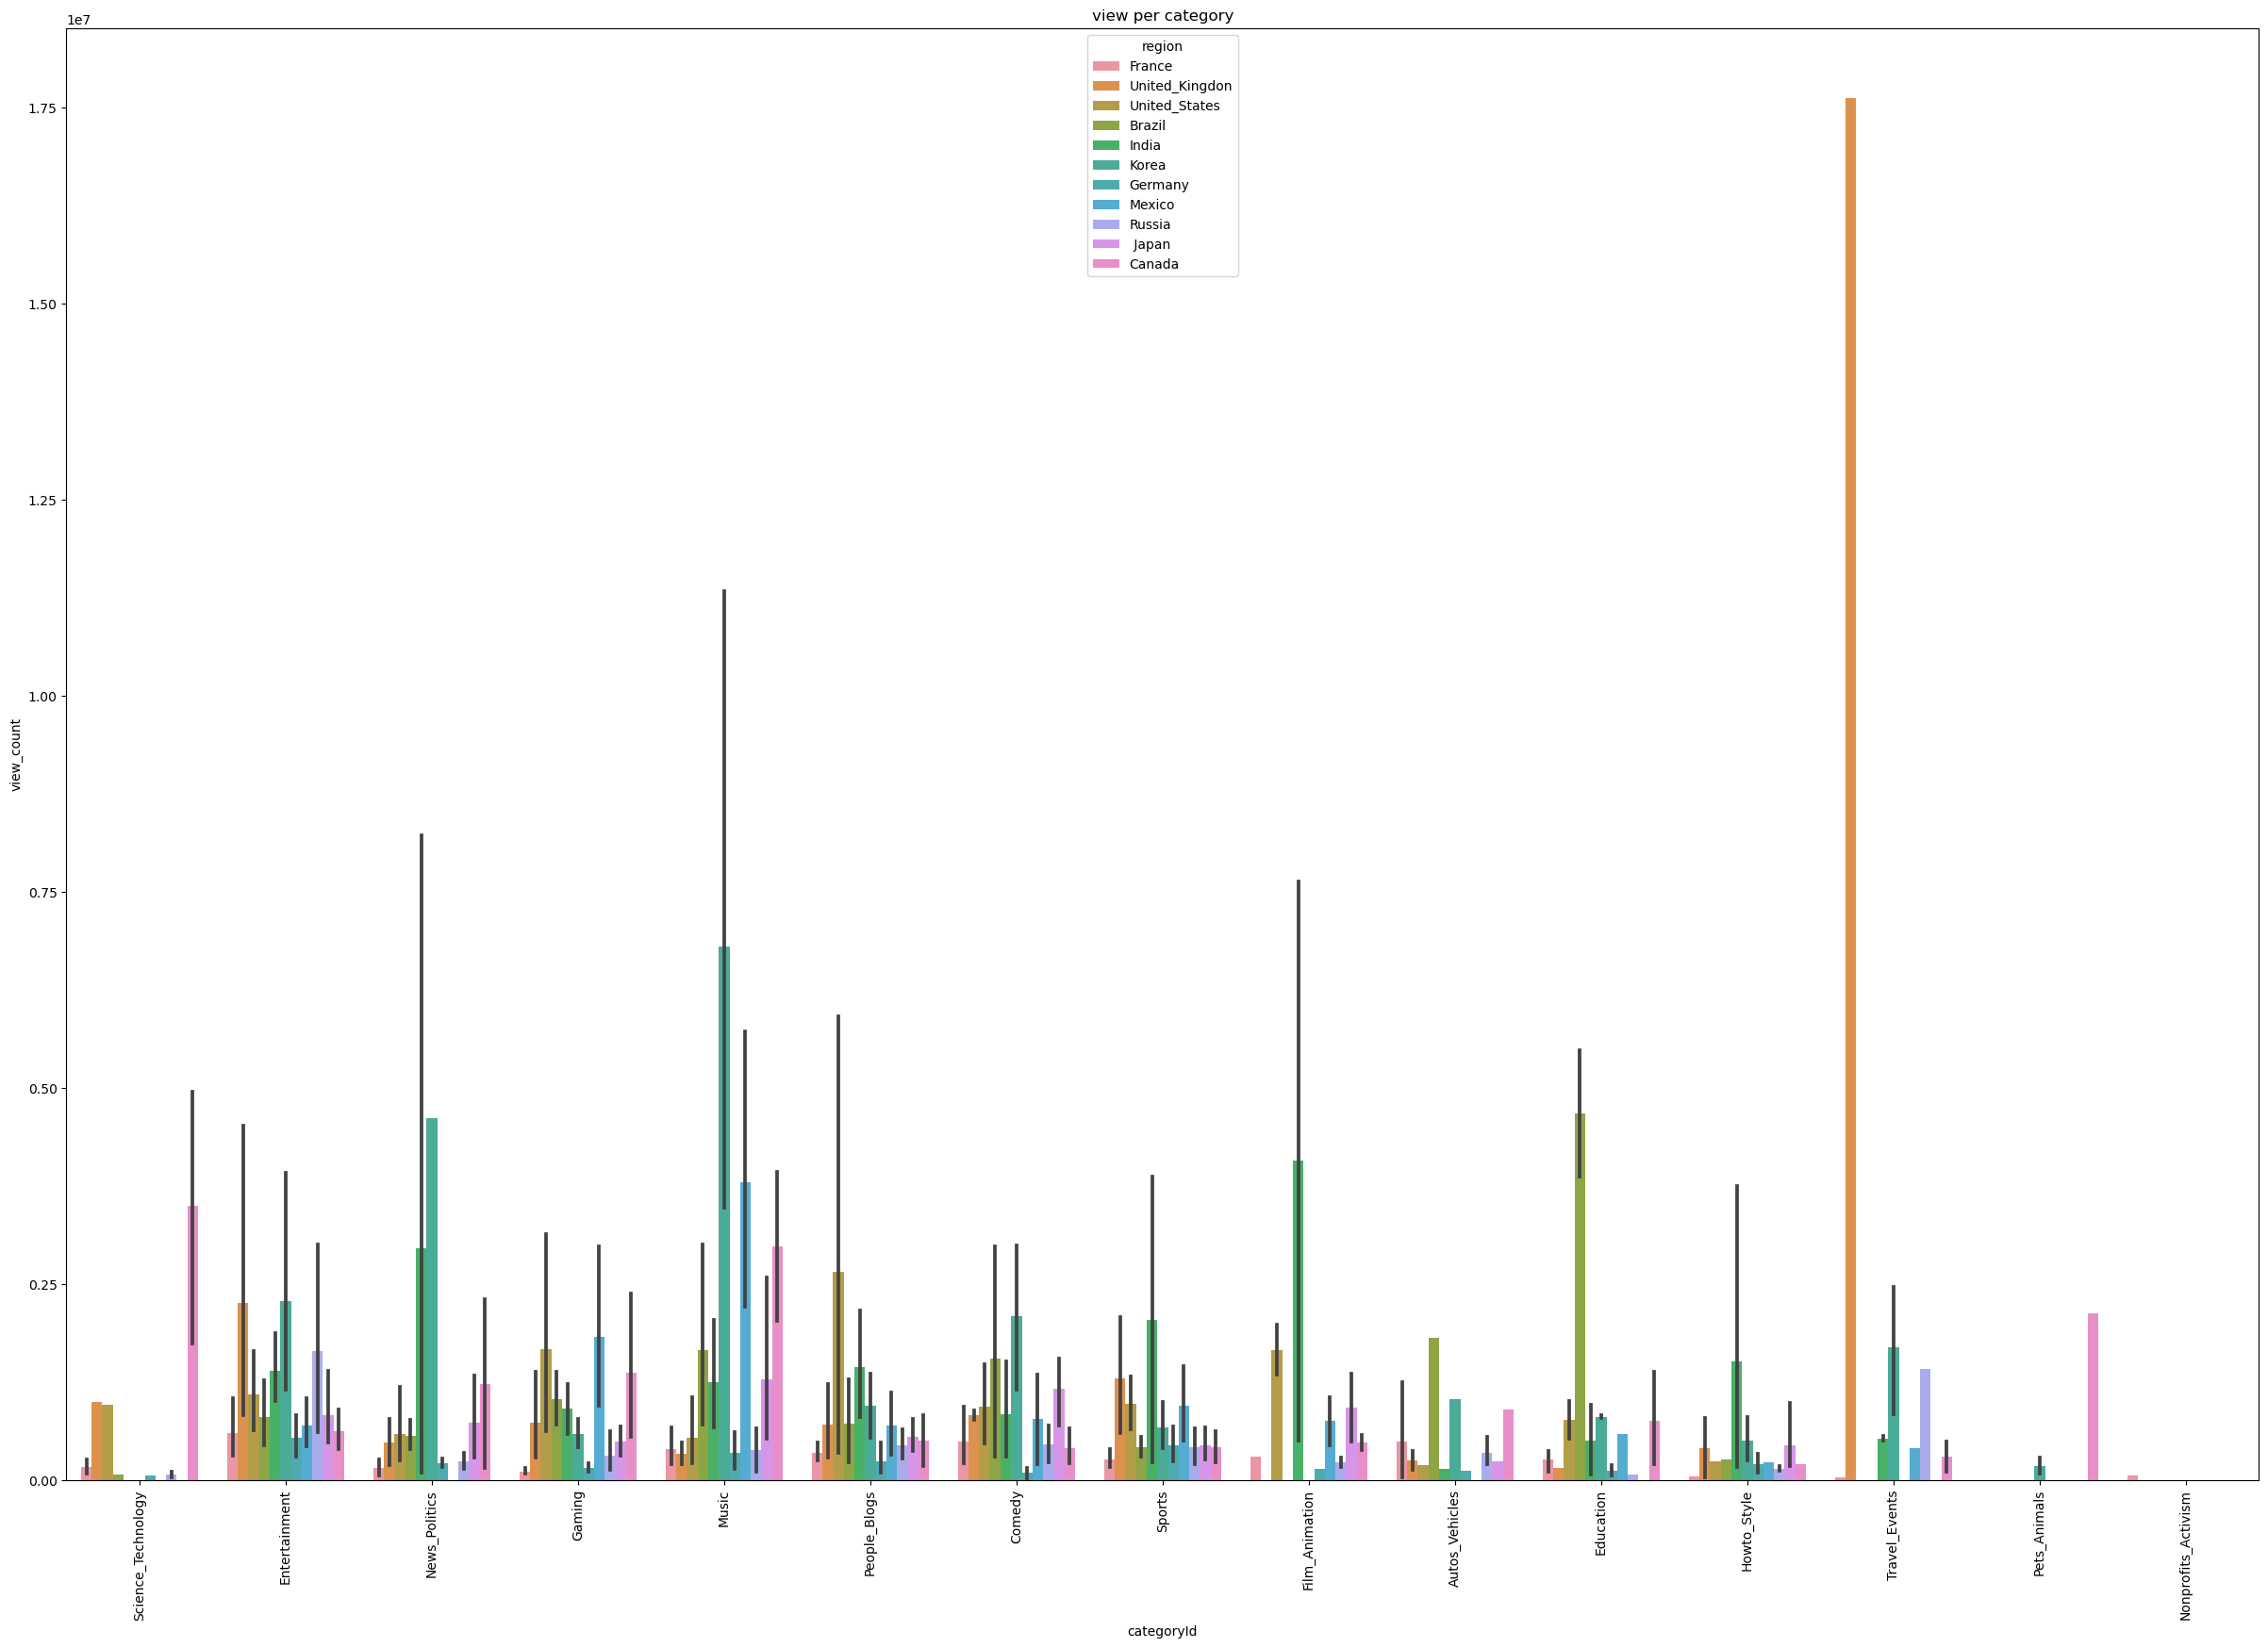

In [ ]:
#view count compared by region/category 
region_category(train)

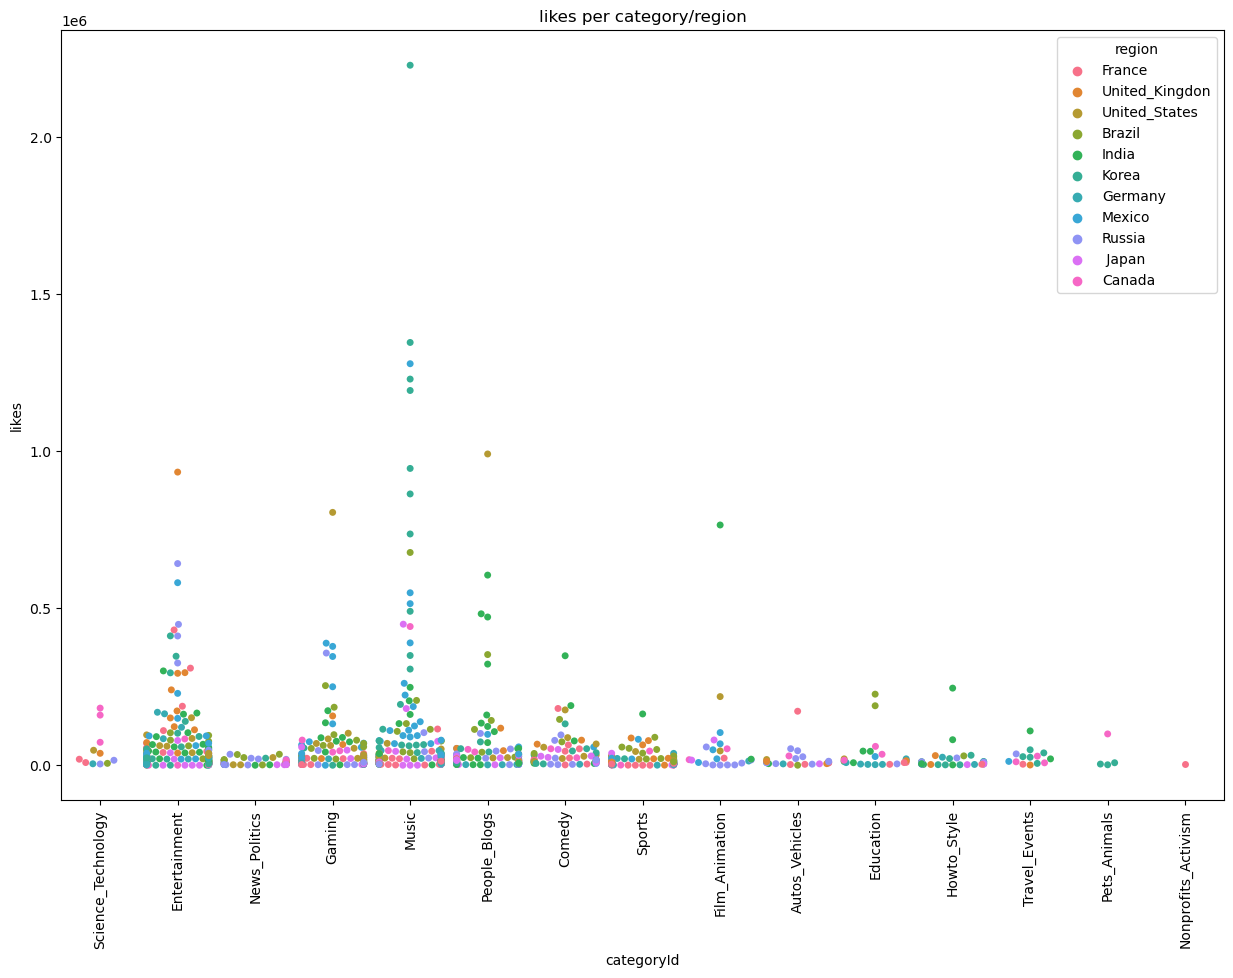

In [ ]:
#likes compared by region
region_category2(train)

# Exploration Summary:
- Entertainment might have been the highest overall but doesnt mean it was liked/or viewed the most. Just means most videos are categories as entertainment
- Music/Entertainment have the highest words count but it could be because they both take up at least 15 percent and above of the whole dataframe
- Region effect on trending video alot because in some country music isnt the highest or entertainment 
- Having the comments enabled doesnt really effect the like/views to high so i think it doesnt matter if the video is bad or good as longest it gets views or some likes.


# Modeling
- All models had roughly almost the same accuracy for train and validate sets.
- Logistic Regression model performed the worst on out-of-sample data.
- The best performing model is Decision Tree Classifier.
- However, from the above model analysis we can see that the highest accuracy is achieved by Decision Tree. It performs better than baseline by about 7%.

- While this is an improvement there is still room for improvement in future iterations
--- 


## Features for Modeling
    - 'age_scaled', 'num_of_tags_scaled','duration_scaled', 'num_of_tags_scaled','engagement_scaled', 'sponsored_scaled', 'title_in_description', 'title_in_tags', 'pct_tags_in_description', 'title_lengths', 'desc_lengths','tags_length'
- features selected were primary means of differientation among top 25 type videos and those without the designation


## Top Models


* Exposed top models from train section to the Validation subset of data
* Model performace on Validate subset:

Model	| Accuracy(Score)   |Type                       |Parameters             |
|---    | ---               |---                        |---                    |
|DTC 13 |	0.94651         |Decision Tree Classifier   |Depth: 14
|DTC 12 |	0.94284         |Decision Tree Classifier   |Depth: 13
|RF 0   |   0.94442         |Random Forest              |Min Leaf Sample: 1
|DTC 11 |	0.94076         |Decision Tree Classifier   |Depth: 12
|DTC 10 |	0.94022         |Decision Tree Classifier   |Depth: 11

---
## Test
* Top Model Performance on Test set  

|    | Model    |   Accuracy(Score) | Type                     | Parameters   |
|---:|:---------|------------------:|:-------------------------|:-------------|
|  0 | Baseline |          0.87     | Basic Baseline           | n/a          |
|  1 | DTC 14   |          0.938    | Decision Tree Classifier | Depth: 14    |

---

In [ ]:
from importlib import reload

In [ ]:
features_to_scale = ['age','num_of_tags','duration','num_of_tags','engagement','sponsored', 'title_in_description', 
        'title_in_tags','pct_tags_in_description', 'title_lengths', 'desc_lengths','tags_length']

In [ ]:
train_scaled, validate_scaled, test_scaled = model.scale_data(train, validate, test, features_to_scale)
X_train, y_train, X_validate, y_validate, X_test, y_test = model.getting_(train_scaled,validate_scaled,test_scaled)
model.run__on_test(X_train, y_train, X_test, y_test)

0.839

# Conclusion
## Summary of Key Findings
* Entertaiment videos are by far the most popular
* Non-Profit videos receive the most engagement
* Global trends stay fairly consistent, but their is some variance
* Release timing is an important factor when wanting to make the jump to becoming a Top 25 video
---
## Suggestions and Next Steps
* Recommendations: Focus content on a mix of Non-Profit and Entertainment content released early in the day to capture widest audience
* Future Talk: With more time we would incorporate more data featuring channel analytics because who is posting is just as important as what is being posted
* Next Steps: Work to capture more channel information. Provide deeper insights in regards to content release schedule and global appeal

